# Distribution and sampling

In this mission, we'll be looking at US income data. Each row is a single county in the US. For each county, we have the following columns:

* `id` -- the county id.
* `county` -- the name and state of the county.
* `pop_over_25` -- the number of adults over age 25.
* `median_income` -- the median income for residents over age 25 in the county.
* `median_income_no_hs` -- median income for residents without a high school education.
* `median_income_hs` -- median income for high school graduates who didn't go to college.
* `median_income_some_college` -- median income for residents who went to college but didn't graduate.
* `median_income_college` -- median income for college graduates.
* `median_income_graduate_degree` -- median income for those with a masters or other graduate degree.

The figures are the estimated values for 2013, from the [American Community Survey(ACS)](http://www.census.gov/acs/www/). The ACS is conducted yearly by the US Census Bureau, and gives a picture of demographic changes between the larger census, which the US does every 10 years.


In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [4]:
income = pd.read_csv('data/us_income.csv')
print(income.shape); income.head()

(3143, 9)


,id,county,pop_over_25,median_income,median_income_no_hs,median_income_hs,median_income_some_college,median_income_college,median_income_graduate_degree
0,1001,"Autauga County, Alabama",35696,34581,17946,30157,33225,53248,68125
1,1003,"Baldwin County, Alabama",130063,31352,17474,25242,30922,46017,55933
2,1005,"Barbour County, Alabama",18988,25182,20692,21325,24090,41888,50245
3,1007,"Bibb County, Alabama",15340,27638,22274,28980,22387,30284,42236
4,1009,"Blount County, Alabama",38846,32808,24870,27541,34660,48681,53664


#### instructions
* Find the county with the lowest median income in the US (median_income). Assign the name of the county (county) to lowest_income_county.
* Find the county that has more than 500000 residents with the lowest median income. Assign the name of the county to lowest_income_high_pop_county.

In [11]:
med_income_sorted = income.sort_values(by='median_income')

lowest_income_county = med_income_sorted.iloc[0]['county']
lowest_income_county

'Starr County, Texas'

In [9]:
lowest_income_high_pop_counties = med_income_sorted[med_income_sorted['pop_over_25']>500000]
lowest_income_high_pop_county = lowest_income_high_pop_counties.iloc[0]['county']

lowest_income_high_pop_counties.head()

,id,county,pop_over_25,median_income,median_income_no_hs,median_income_hs,median_income_some_college,median_income_college,median_income_graduate_degree
362,12086,"Miami-Dade County, Florida",1752160,28398,17122,21933,30735,41086,58480
195,6019,"Fresno County, California",553637,28954,15921,25136,31811,51992,67660
1830,36005,"Bronx County, New York",866898,30261,18505,25551,33432,43053,60814
367,12095,"Orange County, Florida",756005,31096,17822,23819,30475,43355,60539
106,4019,"Pima County, Arizona",650440,31630,17437,24478,31138,43332,55313


In [12]:
lowest_income_high_pop_county

'Miami-Dade County, Florida'

### Random numbers

Sometimes, instead of looking at a whole dataset, you just want to take a sample of it. This usually happens when dealing with the whole set of data is impractical. This can be due to processing power and memory constraints -- it is sometimes much faster to analyze 1/10th of a dataset than the whole thing. It can also be due to cost or other complexities.

In [13]:
import random

# Returns a random integer between the numbers 0 and 10, inclusive.
num = random.randint(0, 10)

# Generate a sequence of 10 random numbers between the values of 0 and 10.
random_sequence = [random.randint(0, 10) for _ in range(10)]

# Sometimes, when we generate a random sequence, we want it to be the same sequence whenever the program is run.
# An example is when you use random numbers to select a subset of the data, and you want other people
# looking at the same data to get the same subset.
# We can ensure this by setting a random seed.
# A random seed is an integer that is used to "seed" a random number generator.
# After a random seed is set, the numbers generated after will follow the same sequence.
random.seed(10)
print([random.randint(0,10) for _ in range(5)])
random.seed(10)
# Same sequence as above.
print([random.randint(0,10) for _ in range(5)])
random.seed(11)
# Different seed means different sequence.
print([random.randint(0,10) for _ in range(5)])

[9, 0, 6, 7, 9]
[9, 0, 6, 7, 9]
[7, 8, 7, 7, 8]


In [14]:
random.seed(20)
new_sequence = [random.randint(0,10) for _ in range(10)]

In [15]:
# Let's say that we have some data on how much shoppers spend in a store.
shopping = [300, 200, 100, 600, 20]

# We want to sample the data, and only select 4 elements.

random.seed(1)
shopping_sample = random.sample(shopping, 4)

# 4 random items from the shopping list.
print(shopping_sample)

[200, 300, 20, 600]


### Population vs. sample

Let's say that you have a normal, six-sided die. You roll it four times, and you get `1, 1, 3, 4`. Based on this, could you conclude that there is a 50% probability of rolling a 1, a 25% probability of rolling a 3, and a 25% probability of rolling a 4?

* No, as it's pretty easy to see that a die has a 1/6 chance of rolling any single digit. This means that the probabilities we observe are not necessarily the true probabilities of an event occurring.

* As you may be able to guess, the larger the sample size (in this case, the more rolls we perform), the closer to the "true" probabilities we get. Let's explore this more.

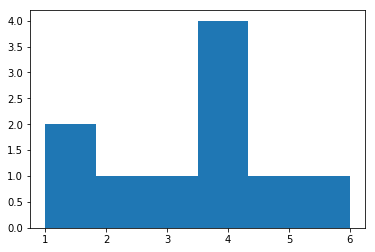

In [16]:
import matplotlib.pyplot as plt

# A function that returns the result of a die roll.
def roll():
    return random.randint(1, 6)

random.seed(1)
small_sample = [roll() for _ in range(10)]

# Plot a histogram with 6 bins (1 for each possible outcome of the die roll)
plt.hist(small_sample, 6)
plt.show()

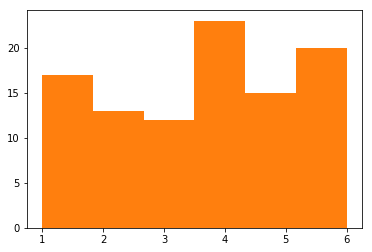

In [18]:
random.seed(1)
one_hundred_die_rolls = [roll() for _ in range(100)]

plt.hist(one_hundred_die_rolls, bins=6)
plt.show()

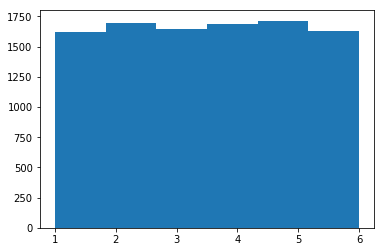

In [19]:
random.seed(1)
ten_thousand_die_rolls = [roll() for _ in range(10000)]

plt.hist(ten_thousand_die_rolls, bins=6)
plt.show()

### Finding the right sample size
We can graph out this variability by repeatedly rolling the die N times. So we could do 20 trials of rolling the die 10 times, and graph out all the resulting probabilities of rolling a 1. This would tell us how much error we could expect by rolling the die 20 times.

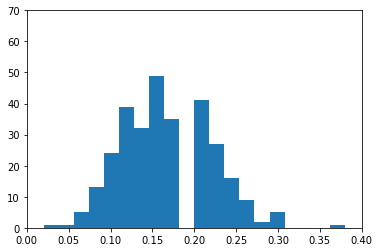

In [20]:
def probability_of_one(num_trials, num_rolls):
    """
    This function will take in the number of trials, and the number of rolls per trial.
    Then it will conduct each trial, and record the probability of rolling a one.
    """
    probabilities = []
    for i in range(num_trials):
        die_rolls = [roll() for _ in range(num_rolls)]
        one_prob = len([d for d in die_rolls if d==1]) / num_rolls
        probabilities.append(one_prob)
    return probabilities

random.seed(1)
small_sample = probability_of_one(300, 50)
plt.hist(small_sample, 20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()

* Set the random seed to `1`, then generate probabilities for `300` trials of `100` die rolls each. Make a histogram with `20` bins.
* Set the random seed to `1`, then generate probabilities for `300` trials of `1000` die rolls each. Make a histogram with `20` bins.

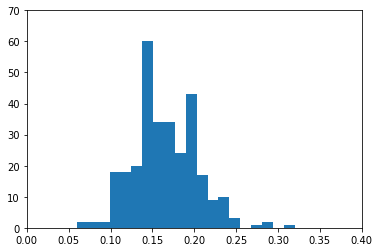

In [23]:
random.seed(1)
sample_probs_300_100 = probability_of_one(300, 100)

plt.hist(sample_probs_300_100, bins=20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()

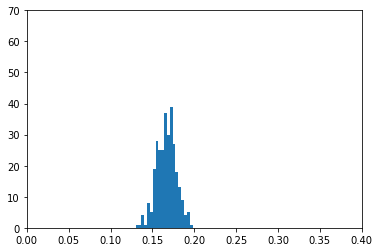

In [24]:
random.seed(1)
sample_probs_300_1000 = probability_of_one(300, 1000)

plt.hist(sample_probs_300_1000, bins=20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()

### What are the odds?

See how the graphs in the last screen got "steeper" as we added more rolls? This is because the variability around the mean decreases as we have more samples in each trial.

* One interesting thing that we can do given the distributions above is find the odds of getting a certain probability for rolling a one given the number of rolls we make.

#### instructions
* Find how many standard deviations away from the mean of large_sample .18 is. Assign the result to deviations_from_mean.
* Find how many probabilities in large sample are greater than or equal to .18. Assign the result to over_18_count.

In [27]:
random.seed(1)
large_sample = probability_of_one(100, 1000)

In [28]:
large_sample_mean = np.mean(large_sample)
large_sample_std = np.std(large_sample)

deviations_from_mean = [(ls-large_sample_mean)/large_sample_std\
                        for ls in large_sample]

over_18_count = len([over18 for over18 in large_sample\
                    if over18 >= .18])

In [30]:
# num of prob in sample greater than/equal to .18
over_18_count 

12

### Sampling counties

31063.0938594


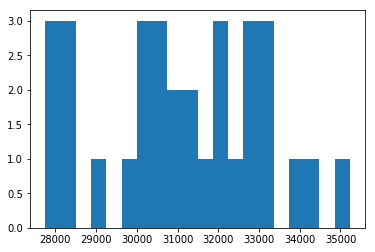

In [31]:
# This is the mean median income in any US county.
mean_median_income = income["median_income"].mean()
print(mean_median_income)

def get_sample_mean(start, end):
    return income["median_income"][start:end].mean()

def find_mean_incomes(row_step):
    mean_median_sample_incomes = []
    # Iterate over the indices of the income rows
    # Starting at 0, and counting in blocks of row_step (0, row_step, row_step * 2, etc).
    for i in range(0, income.shape[0], row_step):
        # Find the mean median for the row_step counties from i to i+row_step.
        mean_median_sample_incomes.append(get_sample_mean(i, i+row_step))
    return mean_median_sample_incomes

nonrandom_sample = find_mean_incomes(100)
plt.hist(nonrandom_sample, 20)
plt.show()

# What you're seeing above is the result of biased sampling.
# Instead of selecting randomly, we selected counties that were next to each other in the data.
# This picked counties in the same state more often that not, and created means that didn't represent the whole country.
# This is the danger of not using random sampling -- you end up with samples that don't reflect the entire population.
# This gives you a distribution that isn't normal.

import random
def select_random_sample(count):
    random_indices = random.sample(range(0, income.shape[0]), count)
    return income.iloc[random_indices]


In [35]:
# check if there is any duplicated value
len(income.county) == len(income.county.unique())

True

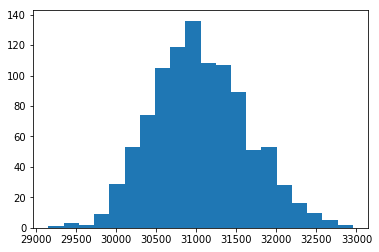

In [42]:
random.seed(1)
sample_mean_median_incomes = [select_random_sample(100)['median_income'].mean()\
                              for _ in range(1000)]

plt.hist(sample_mean_median_incomes, bins=20)
plt.show()

### An experiment

Let's say we're the US government. We want to run an experiment to see whether a certain kind of adult education can help high school graduates earn more relative to college graduates than they could otherwise.<br>

We decide to trial our program in `100` counties, and measure the median incomes of both groups in `5` years.<br>

At the end of `5` years, we first need to measure the whole population to determine the typical ratio between high school graduate earnings and college graduate earnings.

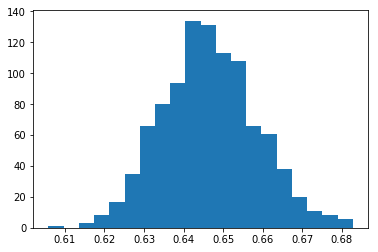

In [44]:
random.seed(1)
sample_incomes = [select_random_sample(100)\
                              for _ in range(1000)]

mean_ratios = []

for sample in sample_incomes:
    
    ratios = sample['median_income_hs'] / sample['median_income_college']
    mean_ratio = ratios.mean()
    mean_ratios.append(mean_ratio)

plt.hist(mean_ratios, bins=20)
plt.show()

### Statistical significance

After 5 years, we determine that the mean ratio in our random sample of 100 counties is .675 -- that is, high school graduates on average earn 67.5% of what college graduates do.<br>

Now that we have our result, how do we know if our hypothesis is correct? Remember, our hypothesis was about the whole population, not about the sample.<br>

Statistical significance is used to determine if a result is valid for a population or not. You usually set a significance level beforehand that will determine if your hypothesis is true or not. After conducting the experiment, you check against the significance level to determine.<br>

### A common significance level is .05. 
This means: "only 5% or less of the time will the result have been due to chance".<br>

In our case, chance could be that the high school graduates in the county changed income some way other than through our program -- maybe some higher paying factory jobs came to town, or there were some other educational initiatives around.<br>

In order to test for significance, we compare our result ratio with the mean ratios we found in the last section.

In [46]:
mean_ratios_gte_675 = [mr for mr in mean_ratios\
                      if mr >= .675]

significance_value = len(mean_ratios_gte_675)/len(mean_ratios)
significance_value

0.014

### Final result

Our significance value was `.014`. Based on the entire population, **only 1.4% of the time will the wage results we saw have occurred on their own**. So our experiment exceeded our significance level (lower means more significant). 
> Thus, our experiment showed that the program did improve the wages of high school graduates relative to college graduates.

You may have noticed earlier that the more samples in our trials, the "steeper" the histograms of outcomes get (look back on the probability of rolling one with the die if you need a refresher). **This "steepness" arose because the more trials we have, the less likely the value is to vary from the "true" value.** <br>

This same principle applies to significance testing. 
> You need a larger deviation from the mean to have something be "significant" if your sample size is smaller. **The larger the trial, the smaller the deviation needs to be to get a significant result**.

You may be asking at this point how we can determine statistical significance without knowing the population values upfront. In a lot of cases, like drug trials, you don't have the capability to measure everyone in the world to compare against your sample.

* **Statistics gives us tools to deal with this, and we'll learn about them in the next missions.**

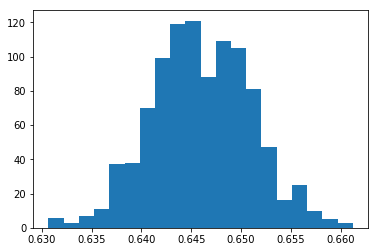

In [47]:
# This is "steeper" than the graph from before, 
# because it has 500 items in each sample.
random.seed(1)
mean_ratios = []
for i in range(1000):
    sample = select_random_sample(500)
    ratios = sample["median_income_hs"] / sample["median_income_college"]
    mean_ratios.append(ratios.mean())
    
plt.hist(mean_ratios, 20)
plt.show()